<a href="https://colab.research.google.com/github/feceugur/CIFAR_10_ImageClassification/blob/main/CIFAR_10_ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# change the path to where your notebook is located
path = "/Drive'ım/ColabNotebooks/CIFAR-10_ImageClassification/"
%cd /content/gdrive/MyDrive/ColabNotebooks/CIFAR-10_ImageClassification/

/content/gdrive/MyDrive/ColabNotebooks/CIFAR-10_ImageClassification


In [5]:
%pwd

'/content/gdrive/MyDrive/ColabNotebooks/CIFAR-10_ImageClassification'

In [6]:
import tensorflow as tf

# Display the version
print(tf.__version__)

# other imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model


2.15.0


In [7]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


170498071/170498071 [==============================] - 3s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [8]:
# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()


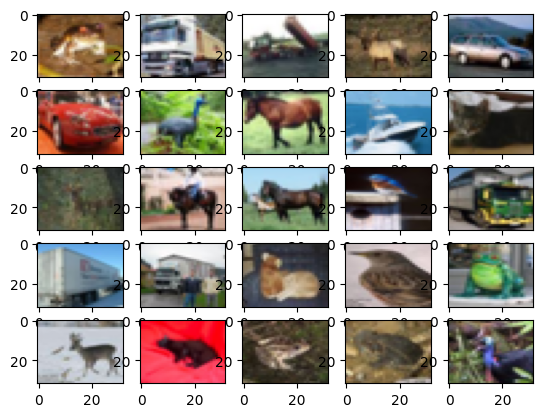

In [9]:
# visualize data by plotting images
fig, ax = plt.subplots(5, 5)
k = 0

for i in range(5):
	for j in range(5):
		ax[i][j].imshow(x_train[k], aspect='auto')
		k += 1

plt.show()


In [10]:
# number of classes
K = len(set(y_train))

# calculate total number of classes
# for output layer
print("number of classes:", K)

# Build the model using the functional API
# input layer
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

# model description
model.summary()


number of classes: 10
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16,

In [11]:
# Compile
model.compile(optimizer='adam',
			loss='sparse_categorical_crossentropy',
			metrics=['accuracy'])


In [12]:
# Fit
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=25)


Epoch 1/25
1563/1563 [==============================] - 24s 10ms/step - loss: 1.3215 - accuracy: 0.5452 - val_loss: 1.0177 - val_accuracy: 0.6580
Epoch 2/25
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8417 - accuracy: 0.7085 - val_loss: 0.8976 - val_accuracy: 0.7029
Epoch 3/25
1563/1563 [==============================] - 13s 8ms/step - loss: 0.6859 - accuracy: 0.7638 - val_loss: 0.6898 - val_accuracy: 0.7638
Epoch 4/25
1563/1563 [==============================] - 13s 8ms/step - loss: 0.5814 - accuracy: 0.8013 - val_loss: 0.7128 - val_accuracy: 0.7624
Epoch 5/25
1563/1563 [==============================] - 12s 8ms/step - loss: 0.4963 - accuracy: 0.8306 - val_loss: 0.7957 - val_accuracy: 0.7478
Epoch 6/25
1563/1563 [==============================] - 12s 8ms/step - loss: 0.4172 - accuracy: 0.8561 - val_loss: 0.7277 - val_accuracy: 0.7742
Epoch 7/25
1563/1563 [==============================] - 12s 8ms/step - loss: 0.3568 - accuracy: 0.8783 - val_loss: 0.6156 - val_a

In [13]:
# Fit with data augmentation
# Note: if you run this AFTER calling
# the previous model.fit()
# it will CONTINUE training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

r = model.fit(train_generator, validation_data=(x_test, y_test),
			steps_per_epoch=steps_per_epoch, epochs=50)


Epoch 1/50
1562/1562 [==============================] - 38s 24ms/step - loss: 0.5722 - accuracy: 0.8160 - val_loss: 0.5487 - val_accuracy: 0.8222
Epoch 2/50
1562/1562 [==============================] - 40s 25ms/step - loss: 0.4635 - accuracy: 0.8456 - val_loss: 0.4944 - val_accuracy: 0.8355
Epoch 3/50
1562/1562 [==============================] - 37s 24ms/step - loss: 0.4236 - accuracy: 0.8569 - val_loss: 0.4858 - val_accuracy: 0.8419
Epoch 4/50
1562/1562 [==============================] - 37s 24ms/step - loss: 0.4007 - accuracy: 0.8652 - val_loss: 0.4355 - val_accuracy: 0.8555
Epoch 5/50
1562/1562 [==============================] - 40s 26ms/step - loss: 0.3851 - accuracy: 0.8697 - val_loss: 0.4741 - val_accuracy: 0.8476
Epoch 6/50
1562/1562 [==============================] - 37s 24ms/step - loss: 0.3643 - accuracy: 0.8757 - val_loss: 0.4306 - val_accuracy: 0.8586
Epoch 7/50
1562/1562 [==============================] - 38s 24ms/step - loss: 0.3533 - accuracy: 0.8803 - val_loss: 0.5032 -

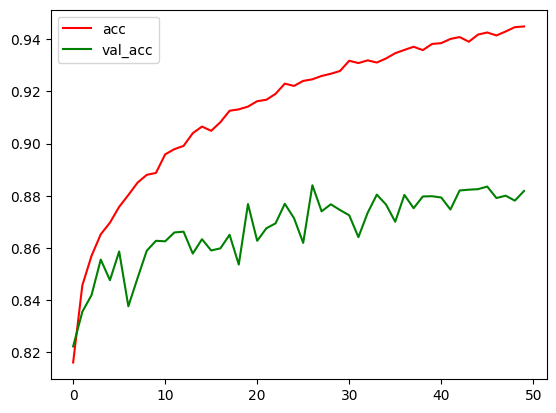

In [14]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.legend()


1/1 [==============================] - 0s 18ms/step


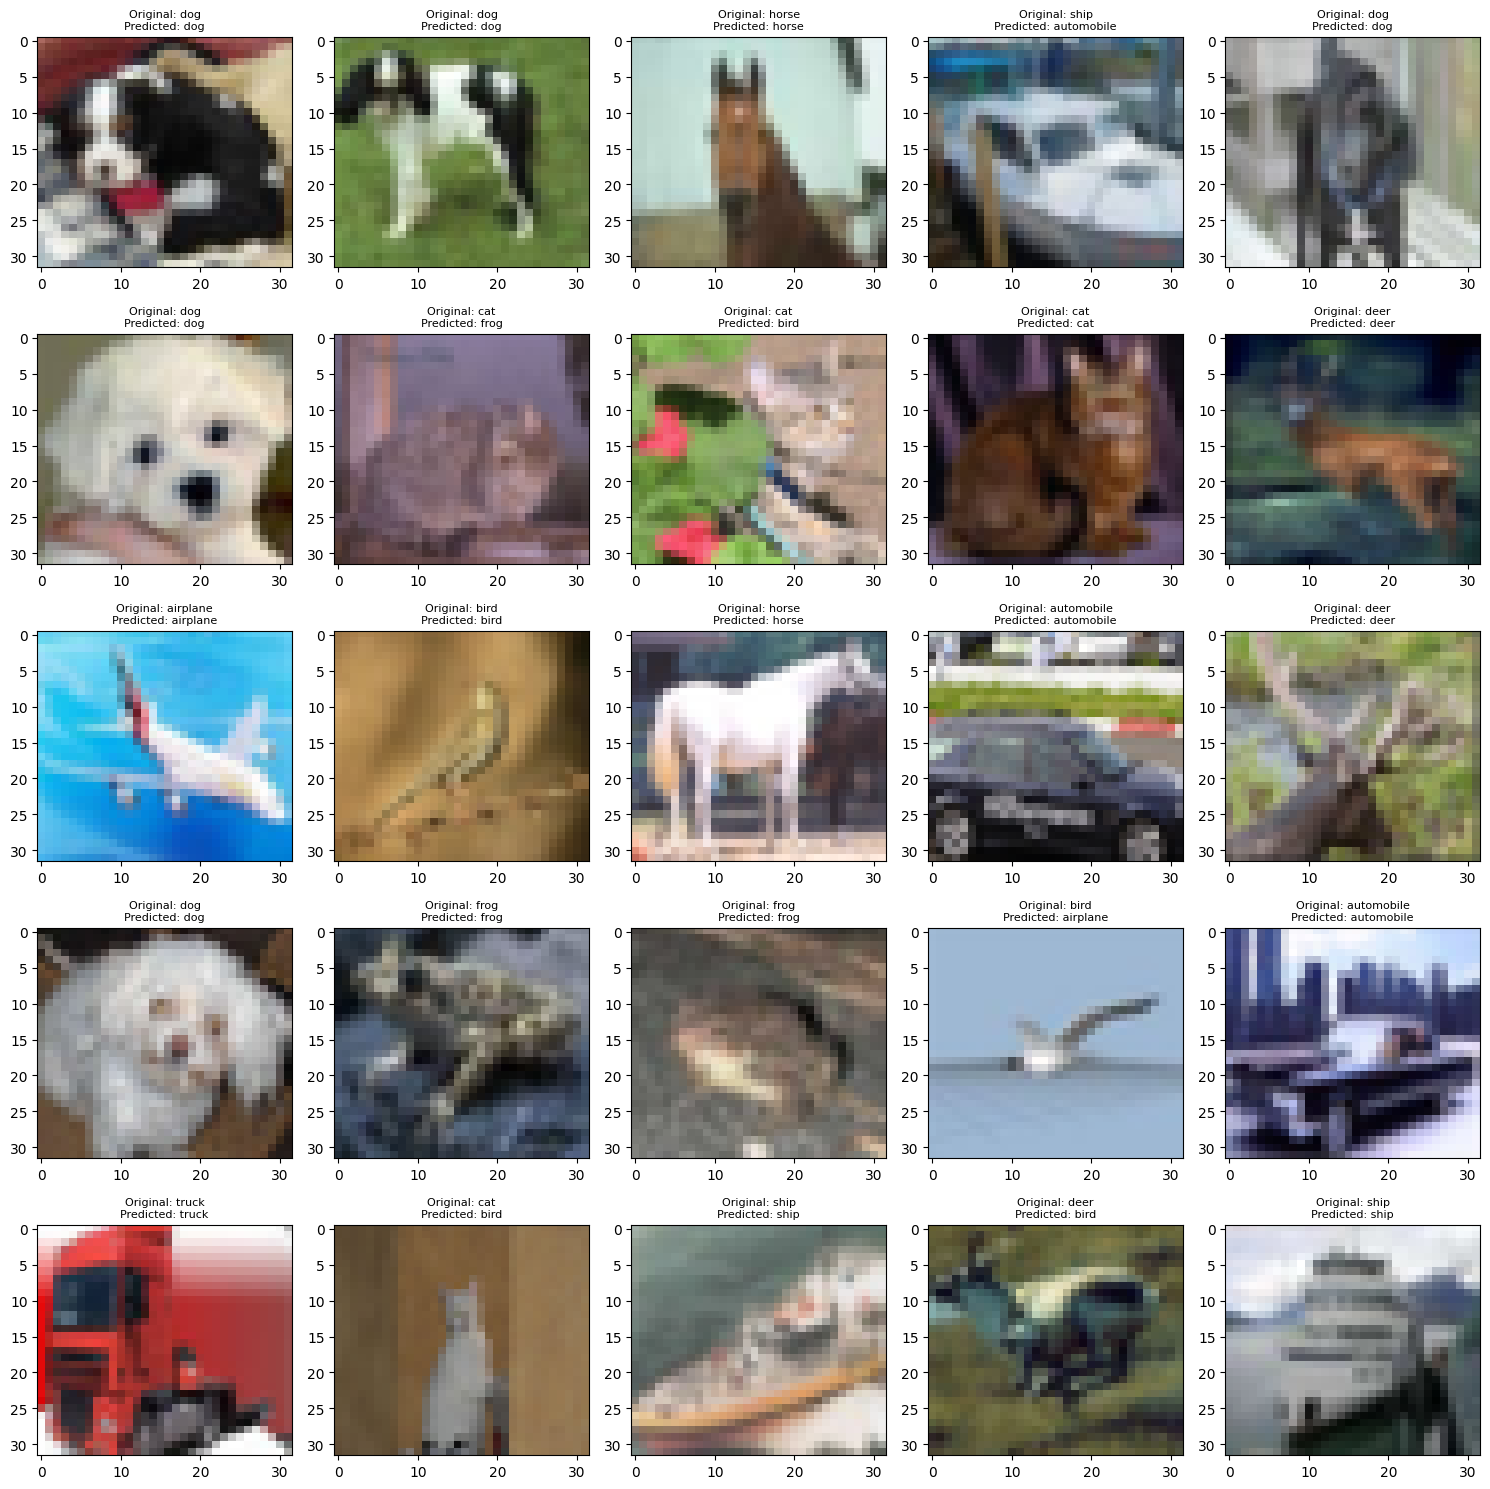

In [46]:
import random
import numpy as np
import matplotlib.pyplot as plt

# label mapping
labels = '''airplane automobile bird cat deer dog frog horse ship truck'''.split()
num_classes = len(labels)

fig, ax = plt.subplots(5, 5, figsize=(15, 15))
k = 0

# select the image from our test dataset
for i in range(5):
    for j in range(5):
        image_number = random.randint(0, 10000)
        ax[i][j].imshow(x_test[image_number], aspect='auto')

        # load the image in an array
        n = np.array(x_test[image_number])

        # reshape it
        p = n.reshape(1, 32, 32, 3)

        # pass in the network for prediction and
        # save the predicted label
        predicted_label = labels[model.predict(p).argmax()]

        # load the original label
        original_label = labels[y_test[image_number]]

        # display the result
        title = f"Original: {original_label}\nPredicted: {predicted_label}"
        ax[i][j].set_title(title, fontsize=8)
        k += 1

plt.tight_layout()
plt.show()


In [16]:
model.save('CIFAR-10_Clasifier.keras')

In [48]:
print(labels)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [52]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Overall Accuracy: {accuracy:.2%}')

# Classification Report
class_report = classification_report(y_test, y_pred_classes)
print('Classification Report:\n', class_report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print('Confusion Matrix:\n', conf_matrix)
class_names = labels

# Calculate metrics for each class
for class_idx in range(K):
    class_true = y_test == class_idx
    class_pred = y_pred_classes == class_idx

    # Accuracy for the class
    class_accuracy = accuracy_score(class_true, class_pred)

    # Recall for the class
    class_recall = conf_matrix[class_idx, class_idx] / np.sum(conf_matrix[class_idx, :])
    print(f'{class_names[class_idx]} Recall: {class_recall:.2%}')

    # F1 Score for the class
    class_precision = conf_matrix[class_idx, class_idx] / np.sum(conf_matrix[:, class_idx])
    class_f1 = 2 * (class_precision * class_recall) / (class_precision + class_recall)
    print(f'{class_names[class_idx]} F1 Score: {class_f1:.2%}')
    print('-' * 30)


313/313 [==============================] - 1s 2ms/step
Overall Accuracy: 88.18%
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.90      1000
           1       0.92      0.97      0.94      1000
           2       0.81      0.85      0.83      1000
           3       0.81      0.73      0.77      1000
           4       0.86      0.88      0.87      1000
           5       0.89      0.76      0.82      1000
           6       0.88      0.93      0.90      1000
           7       0.92      0.92      0.92      1000
           8       0.93      0.94      0.94      1000
           9       0.91      0.94      0.92      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Confusion Matrix:
 [[883  13  28   7   8   0   5   4  33  19]
 [  2 974   0   0   2   0   0   0   4  18]
 [ 22   3 855  19  32  17  28  1